In [16]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import colorsys
import math

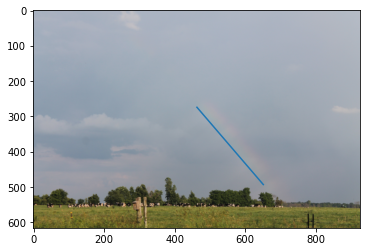

In [3]:
img = image.imread("rainbow.png")
plt.imshow(img)
lx = [463, 651]
ly = [274, 493]
plt.plot(lx, ly)

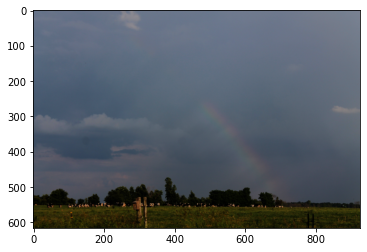

In [4]:
img_linear = img ** 2.2
plt.imshow(img_linear)
image.imsave("rainbow_linear.png", img_linear)

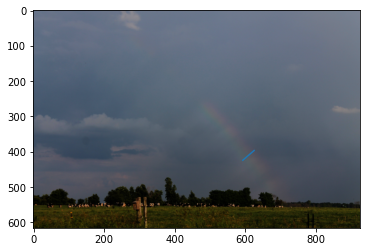

In [5]:
m = (ly[1] - ly[0]) / (lx[1] - lx[0])
tx = 593
ty = 424
tx2 = 625
ty2 = (tx2 - tx) * -1/m + ty
plt.imshow(img_linear)
plt.plot([tx, tx2], [ty, ty2])

In [15]:
hsv = colorsys.rgb_to_hsv(*img_linear[274, 463])
print(hsv[0] * 360, hsv[1] * 100, hsv[2] * 100)

205.6857007741928 25.061920285224915 45.907992124557495


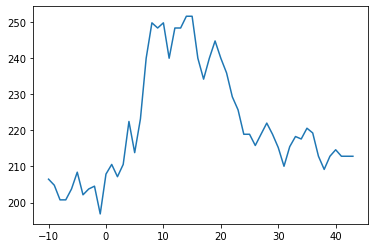

In [7]:
seq = range(-10, tx2 - tx + 12)
hsvs = np.zeros((len(seq), 3))

for i in seq:
    x = tx + i
    y = i * -1/m + ty
    y = math.floor(y)
    rgb = img_linear[y, x, :]
    
    hsvs[i, :] = colorsys.rgb_to_hsv(*rgb)

plt.plot(seq, hsvs[:, 0] * 360)

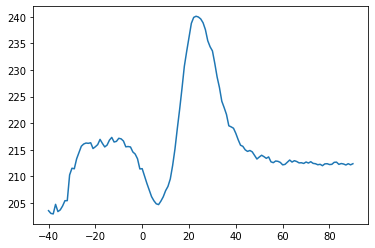

In [8]:
p0 = np.array([lx[0], ly[0]])
p1 = np.array([lx[1], ly[1]])
t = np.array([1, -1/m])
seq = np.arange(-40, 91)
hsvs = np.zeros((len(seq), 3))

for c in np.linspace(p0, p1, 100):
    for i in range(len(seq)):
        p = c + seq[i] * t
        rgb = img_linear[math.floor(p[1]), math.floor(p[0]), :]
        hsvs[i, :] += colorsys.rgb_to_hsv(*rgb)

hsvs /= 100
plt.plot(seq, hsvs[:, 0] * 360)
#plt.plot(seq, hsvs[:, 1] * 100)

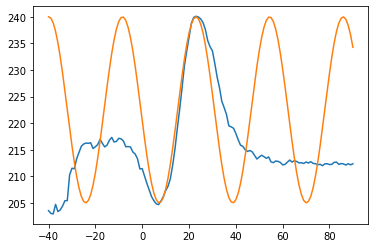

In [9]:
def fit(x):
    return 17.5 * np.cos((x - 23) / 5) + 222.5

plt.plot(seq, hsvs[:, 0] * 360)
plt.plot(seq, fit(seq))

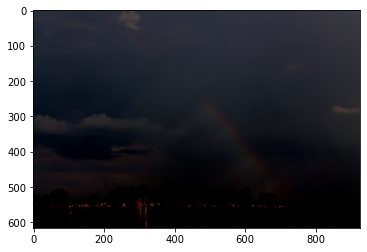

In [10]:
background = np.array([62, 71, 79]) / 255. #np.array([75, 87, 101]) / 255.
img_diff = img_linear - background
img_diff[img_diff < 0] = 0
plt.imshow(img_diff)
image.imsave("rainbow_diff.png", img_diff)

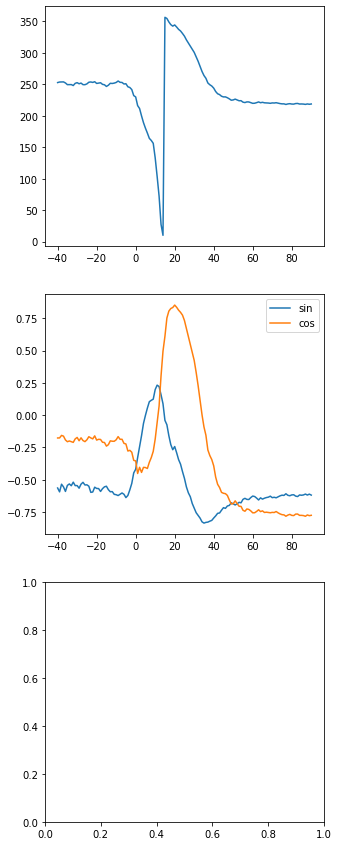

In [14]:
p0 = np.array([lx[0], ly[0]])
p1 = np.array([lx[1], ly[1]])
t = np.array([1, -1/m])

seq = np.arange(-40, 91)
sins = np.zeros(len(seq))
coss = np.zeros(len(seq))
hsvs = np.zeros(len(seq))

wheel = np.zeros((len(seq), 360))

for c in np.linspace(p0, p1, 100):
    for i in range(len(seq)):
        p = c + seq[i] * t
        rgb = img_diff[math.floor(p[1]), math.floor(p[0]), :]
        hsv = colorsys.rgb_to_hsv(*rgb)
        
        sins[i] += math.sin(hsv[0] * 2 * math.pi)
        coss[i] += math.cos(hsv[0] * 2 * math.pi)
        hsvs[i] += hsv[0] * 360
        wheel[i, math.floor(hsv[0] * 360)] += 1

sins /= 100
coss /= 100
hsvs /= 100
angles = np.arctan2(sins, coss) / np.pi * 180
angles[angles < 0] += 360

fig, axs = plt.subplots(3, figsize=(5, 15))
axs[0].plot(seq, angles)
#axs[1].plot(seq, hsvs)
axs[1].plot(seq, sins, label="sin")
axs[1].plot(seq, coss, label="cos")
axs[1].legend()

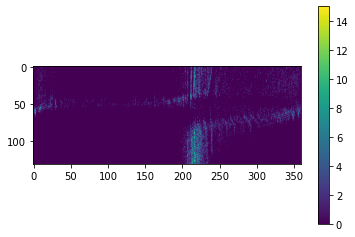

In [18]:
plt.imshow(wheel)
plt.colorbar()